In [14]:
from PIL import Image 
from numpy import *
import os
from numpy import array
from sklearn.decomposition import TruncatedSVD
import scipy
import numpy as np

# <h1><center>Import exmaple images !</center></h1>

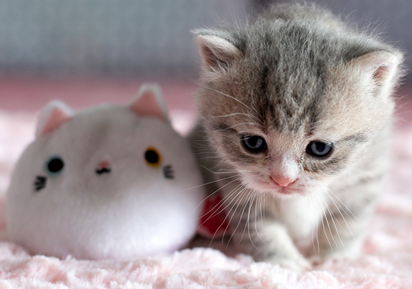

In [2]:
pil_im=Image.open('images/cat.png')
pil_im

## let's define the PCA function

## Steps behind the PCA
## Pca is based on the correlation between features. It aims to find the directions of max variances in hgh-dimensional data and projects it onto a new suspace with equal or fewer dimensions than the original ones. 

## Note: before we o the PCA, we need to standardze the features if they are easured on different scales and we want to assign equal importance to all features. 

## Steps: 
# 1, Standardized the d-dimensional dataset. 
# 2, Construct the covariance matrix. 
# 3, Decompose the covariance matrix into its eigenvectors and eigenvalues. 
# 4, Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors. 
# 5, Select k eigenvectors which correspond to the k largest eigenvalues, where k is the dimensions of the new feature subspace.
# 6, Construct the projection matrix W from the "top" k eigen

In [4]:
def pca(x, k): 
    dimx, dimy = x.shape
    
    mean_x = x.mean(axis=0)
    x= x-mean_x
    
    if dim> num_data: 
        M = dot(x, x.T)
        # C = np.cov(X, rowvar=False) 
        e, EV = scipy.sparse.linalg.eigsh(M, k, which='LM')
        ##largest_eigsh(M, k, which='LM') 
        temp = dot(x.T, EV).T
        V = temp[::-1]
        S = sqrt(e)[::-1]
        for i in range(V.shape[1]):
            V[:,i] /= S 
    else:
        U,S,V = linalg.svd(x)
        V = V[:num_data]
    return V, S, mean_x

In [10]:
im = array(Image.open('images/cat.png').convert('L'))
print(im)
print(im.shape)
x = im

[[140 141 141 ... 116 116 116]
 [140 141 141 ... 115 115 118]
 [140 142 141 ... 117 115 117]
 ...
 [217 217 221 ... 223 222 221]
 [214 213 218 ... 222 222 222]
 [215 213 216 ... 222 224 222]]
(289, 412)


In [18]:
mean_x = x.mean(axis=0)
x= x-mean_x
print(x)
print(x.shape)

[[-30.80968858 -29.76470588 -29.71972318 ... -55.83737024 -55.84083045
  -55.87197232]
 [-30.80968858 -29.76470588 -29.71972318 ... -56.83737024 -56.84083045
  -53.87197232]
 [-30.80968858 -28.76470588 -29.71972318 ... -54.83737024 -56.84083045
  -54.87197232]
 ...
 [ 46.19031142  46.23529412  50.28027682 ...  51.16262976  50.15916955
   49.12802768]
 [ 43.19031142  42.23529412  47.28027682 ...  50.16262976  50.15916955
   50.12802768]
 [ 44.19031142  42.23529412  45.28027682 ...  50.16262976  52.15916955
   50.12802768]]
(289, 412)


In [17]:
C = np.cov(x, rowvar=True) 
print(C)
print(C.shape)

[[1022.81602133 1015.45759688  997.9513462  ...  508.9692449
   515.91453036  507.28472022]
 [1015.45759688 1012.15049763  997.5756657  ...  518.23193164
   524.72817615  516.07111777]
 [ 997.9513462   997.5756657   990.32190127 ...  531.69571616
   537.99985877  529.50833318]
 ...
 [ 508.9692449   518.23193164  531.69571616 ...  670.32713151
   652.74329074  618.62320115]
 [ 515.91453036  524.72817615  537.99985877 ...  652.74329074
   660.99401758  638.74345058]
 [ 507.28472022  516.07111777  529.50833318 ...  618.62320115
   638.74345058  641.93778473]]
(289, 289)


In [19]:
M = dot(x, x.T)
e, EV = scipy.sparse.linalg.eigsh(M, 50, which='LM')

In [23]:
 temp = dot(x.T, EV).T
print(x.T.shape)

(412, 289)


In [22]:
temp
print(temp.shape)

(50, 412)
